In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the dataset
df = pd.read_csv('forestfires.csv')

In [ ]:
# Display the first few rows of the dataset
print(df.head(10))

   X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.0
5  8  6   aug  sun  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0   0.0
6  8  6   aug  mon  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0   0.0
7  8  6   aug  mon  91.5  145.4  608.2  10.7   8.0  86   2.2   0.0   0.0
8  8  6   sep  tue  91.0  129.5  692.6   7.0  13.1  63   5.4   0.0   0.0
9  7  5   sep  sat  92.5   88.0  698.6   7.1  22.8  40   4.0   0.0   0.0


X - x-axis spatial coordinate within the Montesinho park map: 1 to 9

Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9

month - month of the year: 'jan' to 'dec'

day - day of the week: 'mon' to 'sun'

FFMC - FFMC index from the FWI system: 18.7 to 96.20

DMC - DMC index from the FWI system: 1.1 to 291.3

DC - DC index from the FWI system: 7.9 to 860.6

ISI - ISI index from the FWI system: 0.0 to 56.10

temp - temperature in Celsius degrees: 2.2 to 33.30

RH - relative humidity in %: 15.0 to 100

wind - wind speed in km/h: 0.40 to 9.40

rain - outside rain in mm/m2 : 0.0 to 6.4

area - the burned area of the forest (in ha): 0.00 to 1090.84



In [ ]:
# Encoding categorical variables
le = LabelEncoder()
df['month'] = le.fit_transform(df['month'])
df['day'] = le.fit_transform(df['day'])

In [ ]:
# Checking for missing values
print(df.isnull().sum())

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [ ]:
# Descriptive statistics
print(df.describe())

                X           Y       month         day        FFMC         DMC  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807    5.758221    2.736944   90.644681  110.872340   
std      2.313778    1.229900    4.373275    1.925061    5.520111   64.046482   
min      1.000000    2.000000    0.000000    0.000000   18.700000    1.100000   
25%      3.000000    4.000000    1.000000    1.000000   90.200000   68.600000   
50%      4.000000    4.000000    6.000000    3.000000   91.600000  108.300000   
75%      7.000000    5.000000   11.000000    4.000000   92.900000  142.400000   
max      9.000000    9.000000   11.000000    6.000000   96.200000  291.300000   

               DC         ISI        temp          RH        wind        rain  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean   547.940039    9.021663   18.889168   44.288201    4.017602    0.021663   
std    248.066192    4.5594

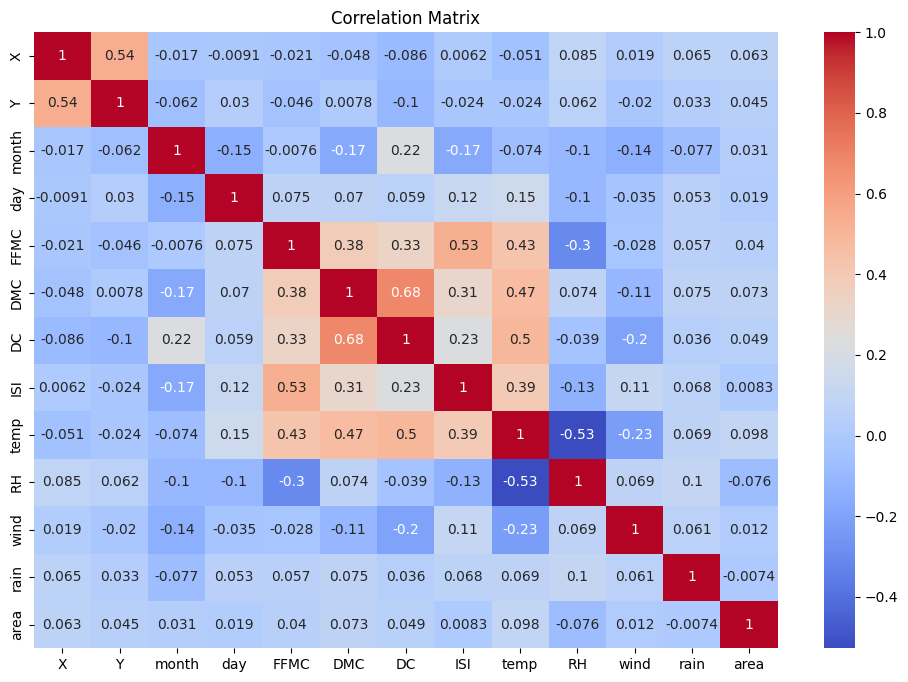

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

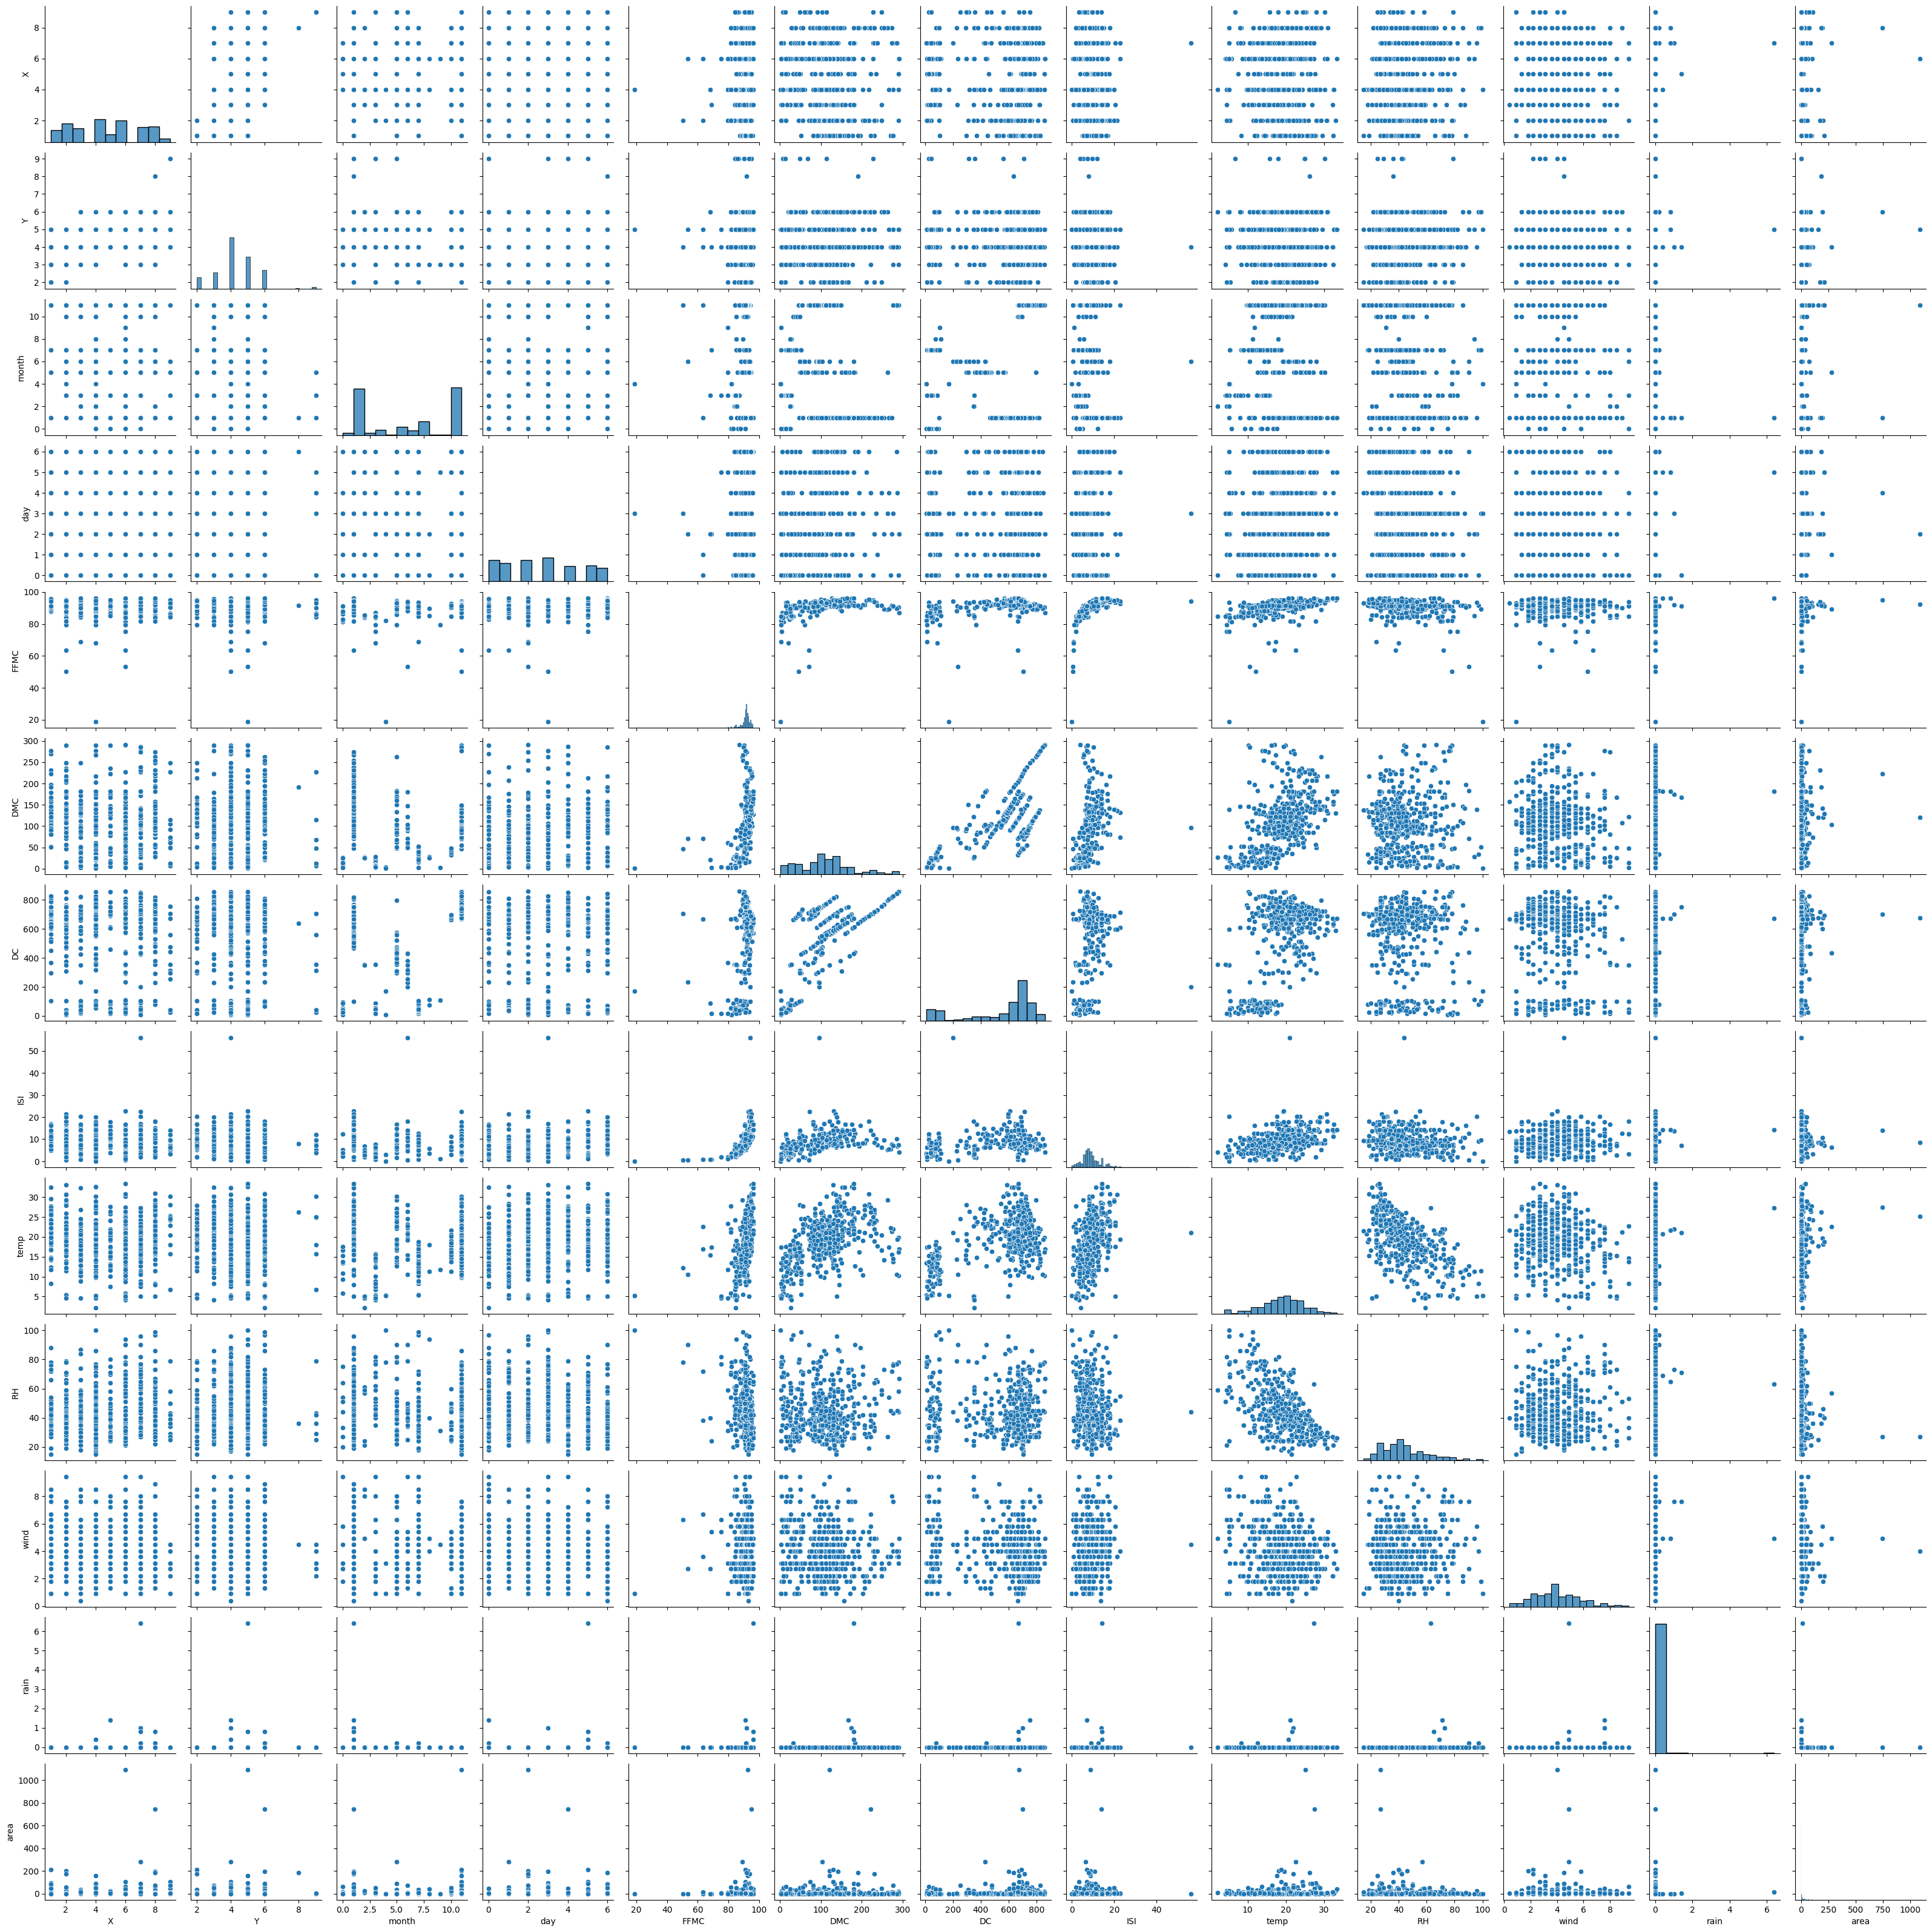

In [ ]:
# Pairplot for visualizing relationships
sns.pairplot(df)
plt.show()


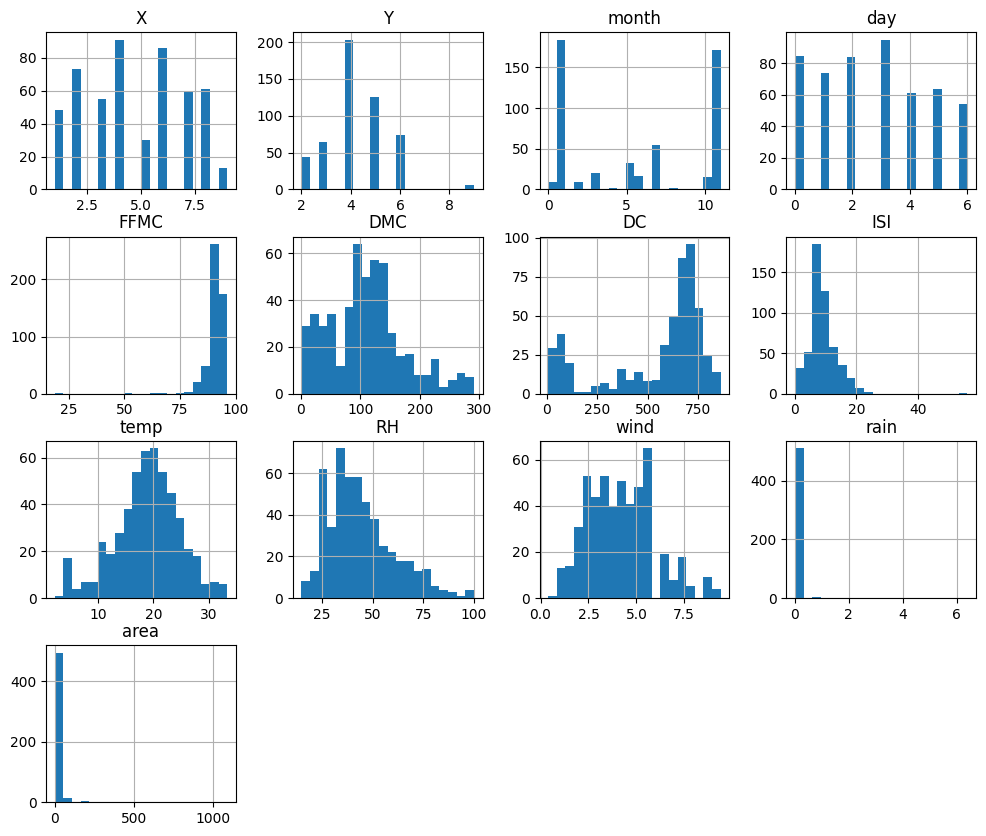

In [ ]:
# Histograms of all numeric columns
df.hist(figsize=(12, 10), bins=20)
plt.show()

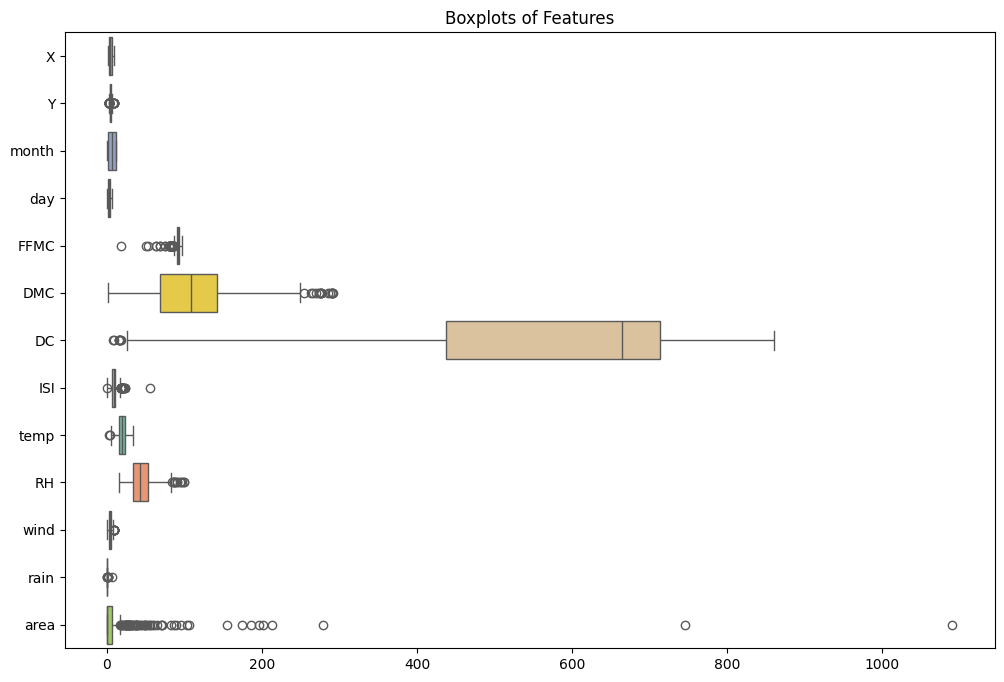

In [ ]:
# Boxplots to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title('Boxplots of Features')
plt.show()

In [ ]:
# Feature Selection and Scaling
X = df.drop(['area'], axis=1)  # Features
y = np.log1p(df['area'])  # Target (log-transformed)

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Model Training with Regularization

In [ ]:
# Ridge Regression (L2 regularization)
ridge = Ridge()
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)


In [ ]:
# Lasso Regression (L1 regularization)
lasso = Lasso()
lasso.fit(X_train_poly, y_train)
y_pred_lasso = lasso.predict(X_test_poly)

# Model Evaluation

In [ ]:
# Ridge Regression Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression - MSE: {mse_ridge}, R²: {r2_ridge}')

Ridge Regression - MSE: 5.959776738978519, R²: -1.7116251604664603


In [ ]:
# Lasso Regression Evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Regression - MSE: {mse_lasso}, R²: {r2_lasso}')


Lasso Regression - MSE: 2.1993494320489915, R²: -0.0006769578458802883


In [ ]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search_ridge = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train_poly, y_train)
best_ridge = grid_search_ridge.best_estimator_

grid_search_lasso = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train_poly, y_train)
best_lasso = grid_search_lasso.best_estimator_

In [ ]:
# Evaluate the tuned models
y_pred_best_ridge = best_ridge.predict(X_test_poly)
y_pred_best_lasso = best_lasso.predict(X_test_poly)

mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
r2_best_ridge = r2_score(y_test, y_pred_best_ridge)
print(f'Tuned Ridge Regression - MSE: {mse_best_ridge}, R²: {r2_best_ridge}')

mse_best_lasso = mean_squared_error(y_test, y_pred_best_lasso)
r2_best_lasso = r2_score(y_test, y_pred_best_lasso)
print(f'Tuned Lasso Regression - MSE: {mse_best_lasso}, R²: {r2_best_lasso}')

Tuned Ridge Regression - MSE: 4.177390386953063, R²: -0.9006612788475259
Tuned Lasso Regression - MSE: 2.1900970604189984, R²: 0.003532757518419749


In [ ]:
# Cross-Validation Score
cv_scores = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores: {cv_scores}')
print(f'Mean Cross-Validation R²: {np.mean(cv_scores)}')

Cross-Validation R² Scores: [-0.04094315 -0.05021851 -0.81595064 -0.03641584 -0.05080506]
Mean Cross-Validation R²: -0.1988666408953217


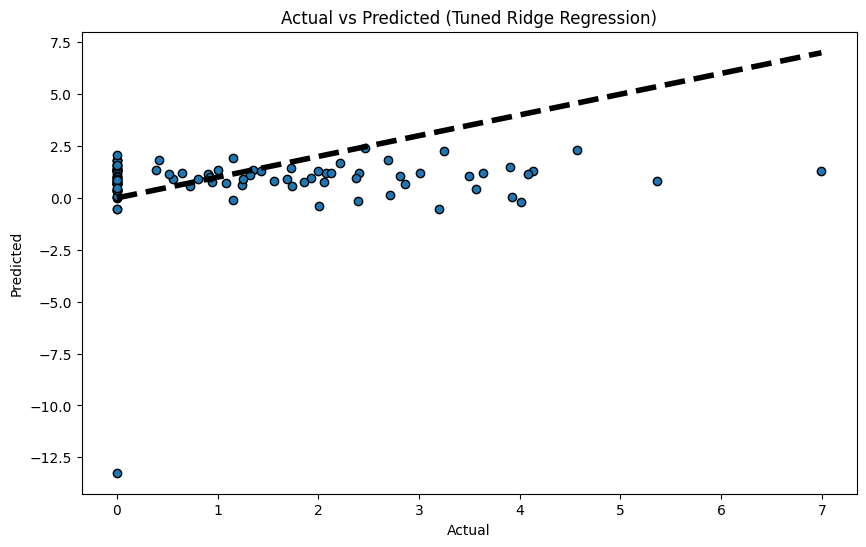

In [ ]:
# Scatter plot of predicted vs actual values for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_ridge, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Tuned Ridge Regression)')
plt.show()


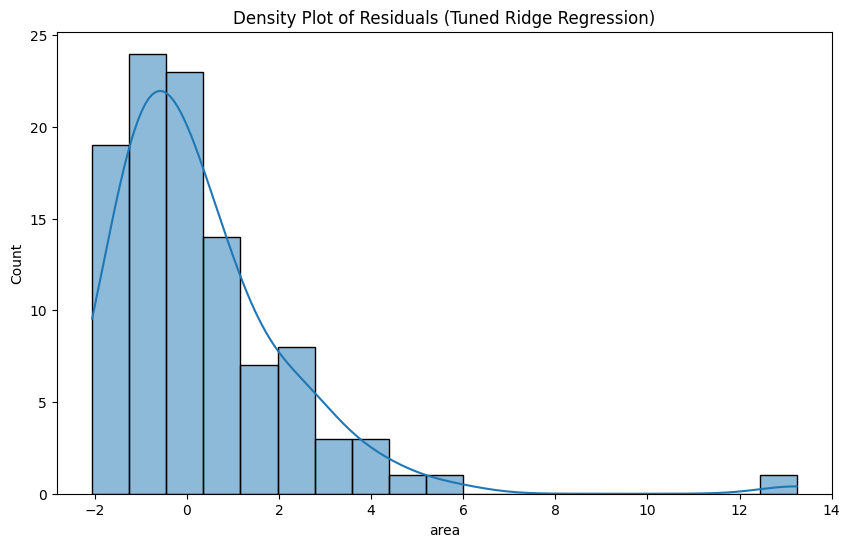

In [ ]:
# Density plot of the residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_best_ridge, kde=True)
plt.title('Density Plot of Residuals (Tuned Ridge Regression)')
plt.show()


In [ ]:
# Classification Accuracy for an accuracy-like measure
threshold = y_test.median()
y_test_class = y_test > threshold
y_pred_class = y_pred_best_ridge > threshold

classification_accuracy = np.mean(y_test_class == y_pred_class)
print(f'Classification Accuracy: {classification_accuracy}')


Classification Accuracy: 0.5480769230769231
